<a href="https://colab.research.google.com/github/TakaNori999/ML_Class/blob/main/FCNN_github(training).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# モジュール
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# データのダウンロード
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test  = X_test.reshape(-1, 784).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [ ]:
# 学習モデルの作成
inputs = tf.keras.Input(shape=(784,), name="inp")
x = tf.keras.layers.Dense(UNITS_FC1, activation="relu", name="fc1")(inputs)
if UNITS_FC2 > 0:
    x = tf.keras.layers.Dense(UNITS_FC2, activation="relu", name="fc2")(x)
if UNITS_FC3 > 0:
    x = tf.keras.layers.Dense(UNITS_FC3, activation="relu", name="fc3")(x)
if UNITS_FC4 > 0:
    x = tf.keras.layers.Dense(UNITS_FC4, activation="relu", name="fc4")(x)
if UNITS_FC5 > 0:
    x = tf.keras.layers.Dense(UNITS_FC5, activation="relu", name="fc5")(x)

logits = tf.keras.layers.Dense(10, name="logits")(x)
outputs = tf.keras.layers.Activation("softmax", name="softmax")(logits)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inp (InputLayer)                │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc3 (Dense)                     │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logits (Dense)                  │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習の実行
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, verbose=1, validation_data=(X_test, y_test))
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test ACC:", test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7249 - loss: 1.0045 - val_accuracy: 0.9210 - val_loss: 0.2856
Test ACC: 0.9210000038146973


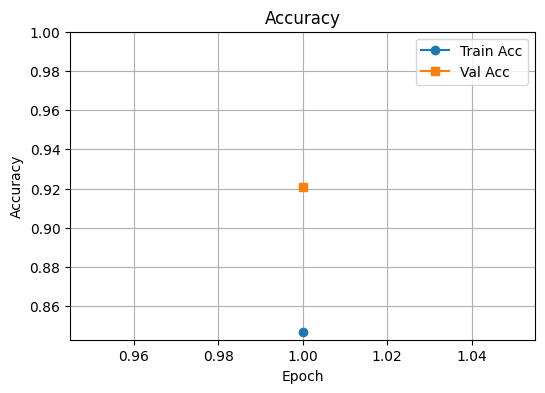

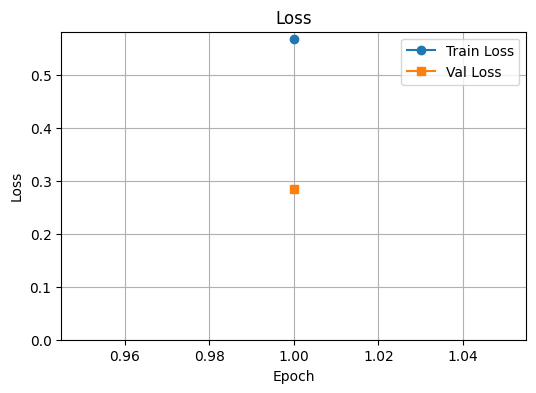

In [ ]:
# 学習履歴の表示
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy
plt.figure(figsize=(6,4))
plt.plot(epochs, acc, marker='o', label='Train Acc')
plt.plot(epochs, val_acc, marker='s', label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(None, 1.0)
plt.grid(True)
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(6,4))
plt.plot(epochs, loss, marker='o', label='Train Loss')
plt.plot(epochs, val_loss, marker='s', label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, None)
plt.grid(True)
plt.legend()
plt.show()